# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city

In [4]:
# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
# print(f"The weather API responded with: {weather_json}.")
weather_json

{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 276.19,
  'feels_like': 269.69,
  'temp_min': 275.37,
  'temp_max': 277.04,
  'pressure': 1004,
  'humidity': 87},
 'visibility': 6000,
 'wind': {'speed': 6.69, 'deg': 60},
 'clouds': {'all': 90},
 'dt': 1612664450,
 'sys': {'type': 1,
  'id': 1414,
  'country': 'GB',
  'sunrise': 1612682938,
  'sunset': 1612717223},
 'timezone': 0,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [69]:
# Loop through the list of cities and perform a request for data on each
lat = []
lng = []
max_temp = []
humid = []
cloud = []
wind_speed = []
country = []
date = []
city_name = []
count = 1
sets = 1
print('Beginning Data Retrieval')    
print('-----------------------------')
for city in cities:
    # Save config information
    url = "http://api.openweathermap.org/data/2.5/weather?"

    # Build query URL
    query_url = url + "units=imperial&appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    # Try to grab city and record #
    try:
        
        print(f'Processing Record {count} of Set {sets} | {city}')
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_name.append(response['name'])
        
        
    # Handle exceptions for a city that is not available in the API
    except:
        # Append null values
        print(f'City not found...skipping')
        pass
    
    #keep track of records and sets(max 50 per set)
    count = count +1
    if count == 50:
        count = 0
        sets = sets + 1

print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | brokopondo
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | maumere
Processing Record 5 of Set 1 | airai
Processing Record 6 of Set 1 | adrar
Processing Record 7 of Set 1 | nikolskoye
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | laguna
Processing Record 10 of Set 1 | samusu
City not found...skipping
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | lazaro cardenas
Processing Record 13 of Set 1 | rumoi
Processing Record 14 of Set 1 | ukiah
Processing Record 15 of Set 1 | mount gambier
Processing Record 16 of Set 1 | la ronge
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | norman wells
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | monrovia
Processing Record 21 of Set 1 | kruisfontein
Processing Record 22 of Set 1 | bluff
Processing Record 23 of Set

Processing Record 38 of Set 4 | dakar
Processing Record 39 of Set 4 | avarua
Processing Record 40 of Set 4 | coihaique
Processing Record 41 of Set 4 | attawapiskat
City not found...skipping
Processing Record 42 of Set 4 | chapais
Processing Record 43 of Set 4 | tchollire
Processing Record 44 of Set 4 | kyaikkami
Processing Record 45 of Set 4 | yambio
Processing Record 46 of Set 4 | bud
Processing Record 47 of Set 4 | ahipara
Processing Record 48 of Set 4 | bibiani
Processing Record 49 of Set 4 | krasnyy klyuch
Processing Record 0 of Set 5 | beringovskiy
Processing Record 1 of Set 5 | fortuna
Processing Record 2 of Set 5 | qandala
Processing Record 3 of Set 5 | kapaa
Processing Record 4 of Set 5 | sirjan
Processing Record 5 of Set 5 | saleaula
City not found...skipping
Processing Record 6 of Set 5 | sorong
Processing Record 7 of Set 5 | salalah
Processing Record 8 of Set 5 | kuopio
Processing Record 9 of Set 5 | suruc
Processing Record 10 of Set 5 | buin
Processing Record 11 of Set 5 | 

Processing Record 27 of Set 8 | trat
Processing Record 28 of Set 8 | buariki
City not found...skipping
Processing Record 29 of Set 8 | huilong
Processing Record 30 of Set 8 | nabire
Processing Record 31 of Set 8 | chumikan
Processing Record 32 of Set 8 | pokhara
Processing Record 33 of Set 8 | vila franca do campo
Processing Record 34 of Set 8 | bonavista
Processing Record 35 of Set 8 | chengde
Processing Record 36 of Set 8 | phuket
Processing Record 37 of Set 8 | champerico
Processing Record 38 of Set 8 | olavarria
Processing Record 39 of Set 8 | dhidhdhoo
Processing Record 40 of Set 8 | hovd
Processing Record 41 of Set 8 | gorahun
Processing Record 42 of Set 8 | golovchino
Processing Record 43 of Set 8 | sioux lookout
Processing Record 44 of Set 8 | oktyabrskoye
Processing Record 45 of Set 8 | byron bay
Processing Record 46 of Set 8 | santa luzia
Processing Record 47 of Set 8 | mount isa
Processing Record 48 of Set 8 | sisimiut
Processing Record 49 of Set 8 | jishou
Processing Record

Processing Record 18 of Set 12 | chickasha
Processing Record 19 of Set 12 | araxa
Processing Record 20 of Set 12 | nemuro
Processing Record 21 of Set 12 | port moresby
Processing Record 22 of Set 12 | narsaq
Processing Record 23 of Set 12 | salo
Processing Record 24 of Set 12 | puerto madryn
Processing Record 25 of Set 12 | avallon
Processing Record 26 of Set 12 | omsukchan
Processing Record 27 of Set 12 | trinidad
Processing Record 28 of Set 12 | pacasmayo
Processing Record 29 of Set 12 | broken hill
Processing Record 30 of Set 12 | nelson bay
Processing Record 31 of Set 12 | doha
Processing Record 32 of Set 12 | tommot
Processing Record 33 of Set 12 | george town
Processing Record 34 of Set 12 | marfino
Processing Record 35 of Set 12 | pishva
Processing Record 36 of Set 12 | nieuw amsterdam
Processing Record 37 of Set 12 | lima
Processing Record 38 of Set 12 | mtsensk
Processing Record 39 of Set 12 | kapuskasing
Processing Record 40 of Set 12 | flinders
Processing Record 41 of Set 12

In [101]:
df[df['Lat'] > 0]

,City,Lat,Lon,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
1,Distrikt Brokopondo,4.7500,-55.1667,74.95,90,100,7.94,SR,1612681561
5,Adrar,20.5022,-10.0711,49.86,51,26,10.20,MR,1612681561
6,Nikolskoye,59.7035,30.7861,12.20,85,90,17.90,RU,1612681194
8,Laguna,38.4210,-121.4238,46.99,76,1,1.41,US,1612681199
10,Lázaro Cárdenas,17.9583,-102.2000,71.08,85,1,3.04,MX,1612681562
...,...,...,...,...,...,...,...,...,...
541,Kapuskasing,49.4169,-82.4331,-11.20,77,0,3.44,CA,1612681631
543,Suileng,47.2500,127.0833,2.80,90,100,9.46,CN,1612681631
545,Kisangani,0.5167,25.2000,77.00,53,0,3.38,CD,1612681631
546,Basoko,1.2391,23.6160,78.66,49,67,3.60,CD,1612681631


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [73]:
df = pd.DataFrame({'City': city_name, 'Lat': lat, 'Lon': lng, 'Max Temp (F)': max_temp, 'Humidity': humid, 'Cloudiness': cloud,'Wind Speed': wind_speed, 'Country': country, 'Date': date})
df.to_csv('cities.csv', encoding='utf-8')
df.head()

,City,Lat,Lon,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,79.63,78,81,23.42,PF,1612681448
1,Distrikt Brokopondo,4.7500,-55.1667,74.95,90,100,7.94,SR,1612681561
2,Punta Arenas,-53.1500,-70.9167,46.40,81,0,10.36,CL,1612681016
3,Maumere,-8.6199,122.2111,83.03,75,97,6.11,ID,1612681561
4,Airai,-8.9266,125.4092,68.79,98,100,3.27,TL,1612681315


In [74]:
df.describe()

,Lat,Lon,Max Temp (F),Humidity,Cloudiness,Wind Speed,Date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,19.311372,19.011792,50.934197,73.801095,54.357664,8.448613,1.612681e+09
std,33.547727,90.529046,32.351650,19.691558,41.266554,6.182391,1.636526e+02
min,-54.800000,-175.200000,-44.000000,14.000000,0.000000,0.540000,1.612681e+09
25%,-8.141100,-58.671850,31.915000,66.000000,1.000000,3.720000,1.612681e+09
50%,22.672500,21.293600,60.800000,78.000000,75.000000,6.910000,1.612682e+09
75%,48.955975,97.667750,76.847500,89.000000,97.000000,11.500000,1.612682e+09
max,78.218600,179.316700,95.000000,100.000000,100.000000,37.220000,1.612682e+09


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [75]:
len(df)

548

In [76]:
quartiles = df['Humidity'].sort_values().quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of humidity is: {lowerq}")
print(f"The upper quartile of humidity is: {upperq}")
print(f"The interquartile range of humidity is: {iqr}")
print(f"The the median of humidity is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of humidity is: 66.0
The upper quartile of humidity is: 89.0
The interquartile range of humidity is: 23.0
The the median of humidity is: 78.0 
Values below 31.5 could be outliers.
Values above 123.5 could be outliers.


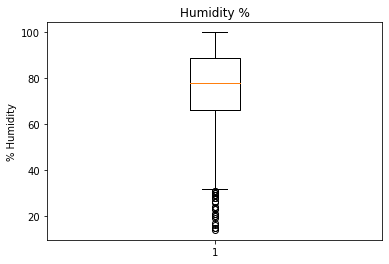

In [77]:
# Example outlier plot of reaction times

fig1, ax1 = plt.subplots()
ax1.set_title('Humidity %')
ax1.set_ylabel('% Humidity')
ax1.boxplot(df['Humidity'])
plt.show()

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [80]:
clean_city_data = df.drop(df.query('Humidity < 31.5 | Humidity > 123.5').index, inplace=False)
# print(len(clean_city_data) - len(df))
clean_city_data.head()

,City,Lat,Lon,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,79.63,78,81,23.42,PF,1612681448
1,Distrikt Brokopondo,4.7500,-55.1667,74.95,90,100,7.94,SR,1612681561
2,Punta Arenas,-53.1500,-70.9167,46.40,81,0,10.36,CL,1612681016
3,Maumere,-8.6199,122.2111,83.03,75,97,6.11,ID,1612681561
4,Airai,-8.9266,125.4092,68.79,98,100,3.27,TL,1612681315


In [115]:
clean_city_data.head()

,City,Lat,Lon,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,79.63,78,81,23.42,PF,1612681448
1,Distrikt Brokopondo,4.7500,-55.1667,74.95,90,100,7.94,SR,1612681561
2,Punta Arenas,-53.1500,-70.9167,46.40,81,0,10.36,CL,1612681016
3,Maumere,-8.6199,122.2111,83.03,75,97,6.11,ID,1612681561
4,Airai,-8.9266,125.4092,68.79,98,100,3.27,TL,1612681315


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


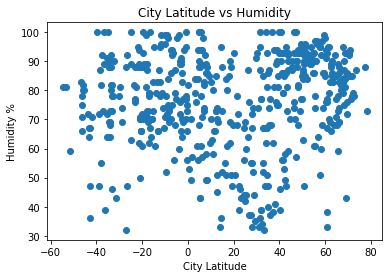

In [81]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Humidity']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Humidity')
plt.xlabel('City Latitude')
plt.ylabel('Humidity %')
plt.show()

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

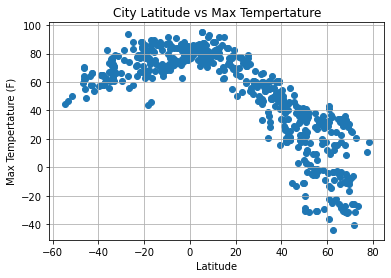

In [86]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Max Temp (F)']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Max Tempertature')
plt.xlabel('Latitude')
plt.ylabel('Max Tempertature (F)')
plt.grid()
plt.show()

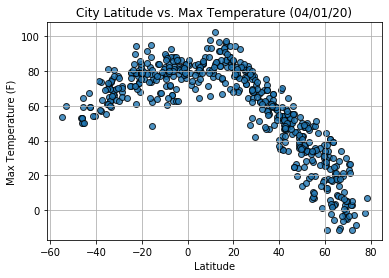

## Latitude vs. Humidity Plot

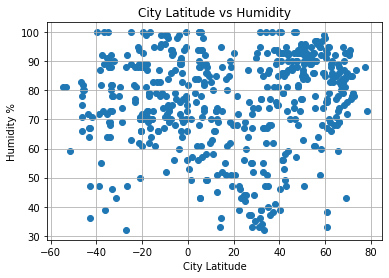

In [131]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Humidity']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Humidity')
plt.xlabel('City Latitude')
plt.ylabel('Humidity %')
plt.grid()
plt.savefig('lat_humidity.png')
plt.show()

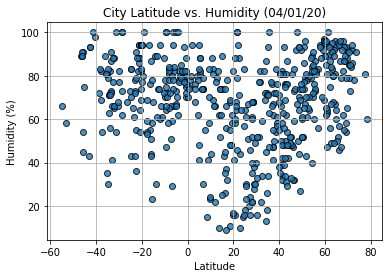

## Latitude vs. Cloudiness Plot

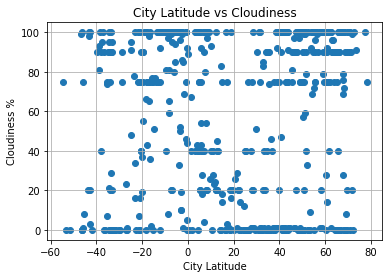

In [88]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Cloudiness']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Cloudiness')
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness %')
plt.grid()
plt.savefig('lat_cloudiness.png')
plt.show()

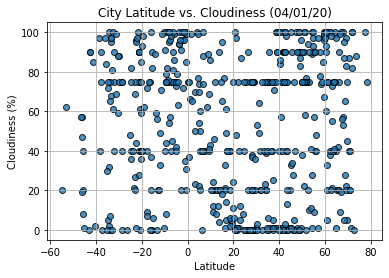

## Latitude vs. Wind Speed Plot

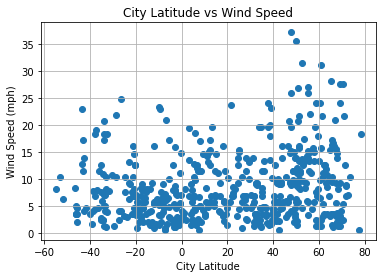

In [89]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Wind Speed']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Wind Speed')
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('lat_wind.png')
plt.show()

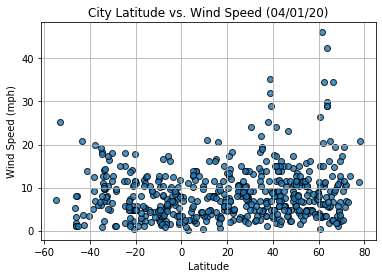

## Linear Regression

In [140]:
# create df's separating northern and southern hemisphere
north_data = clean_city_data.drop(clean_city_data.query('Lat < 0').index, inplace=False)
south_data = clean_city_data.drop(clean_city_data.query('Lat > 0').index, inplace=False)
south_data.head()

,City,Lat,Lon,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,79.63,78,81,23.42,PF,1612681448
2,Punta Arenas,-53.1500,-70.9167,46.40,81,0,10.36,CL,1612681016
3,Maumere,-8.6199,122.2111,83.03,75,97,6.11,ID,1612681561
4,Airai,-8.9266,125.4092,68.79,98,100,3.27,TL,1612681315
7,Mataura,-46.1927,168.8643,70.27,66,0,3.56,NZ,1612681445


The r-value is: 0.18369877527491477


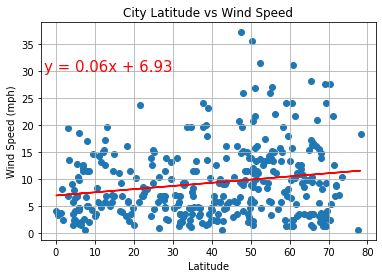

In [141]:
# Add the linear regression equation and line to plot

x_values = north_data['Lat']
y_values = north_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-3,30),fontsize=15,color="red")
plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
print(f'The r-value is: {rvalue}')
plt.show()


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8581852480918044


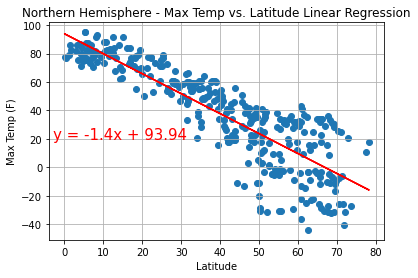

In [142]:

x_values = north_data['Lat']
y_values = north_data['Max Temp (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-3,20),fontsize=15,color="red")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.grid()
plt.savefig('north_lat_temp_lr.png')
print(f'The r-value is: {rvalue}')
plt.show()

The r-value is: 0.46937863826630627


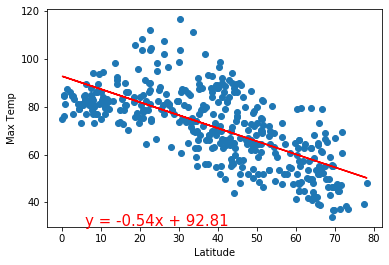

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6072533954835289


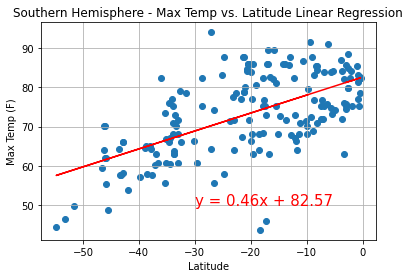

In [143]:
x_values = south_data['Lat']
y_values = south_data['Max Temp (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.grid()
plt.savefig('south_lat_temp_lr.png')
print(f'The r-value is: {rvalue}')
plt.show()

The r-value is: 0.6082708688906918


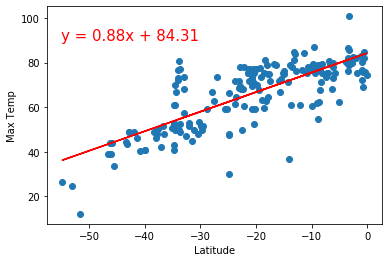

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2913544420778289


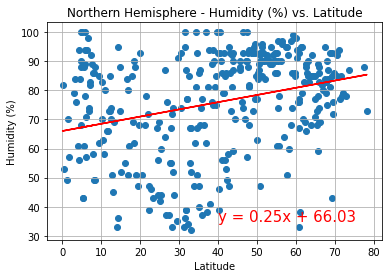

In [145]:
x_values = north_data['Lat']
y_values = north_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,35),fontsize=15,color="red")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
print(f'The r-value is: {rvalue}')
# plt.savefig('north_lat_humidity_lr.png')
plt.show()

The r-value is: 0.000543987878808455


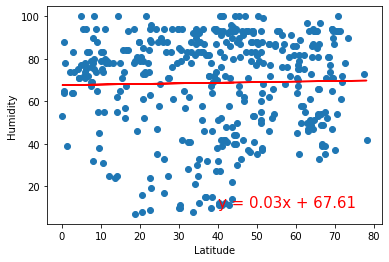

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.16924780154454394


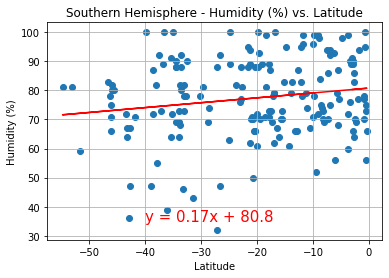

In [147]:
x_values = south_data['Lat']
y_values = south_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,35),fontsize=15,color="red")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
print(f'The r-value is: {rvalue}')
# plt.savefig('south_lat_humidity_lr.png')
plt.show()

The r-value is: 0.014985174297345524


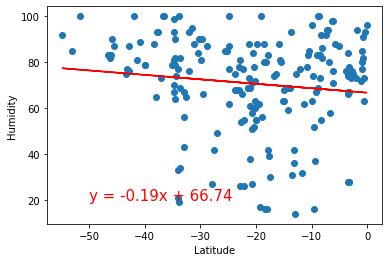

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.23418546428214376


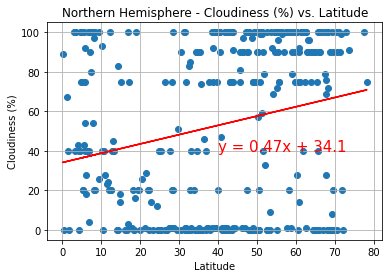

In [148]:
x_values = north_data['Lat']
y_values = north_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
print(f'The r-value is: {rvalue}')
# plt.savefig('south_lat_cloud_lr.png')
plt.show()

The r-value is: 0.0020898727664228514


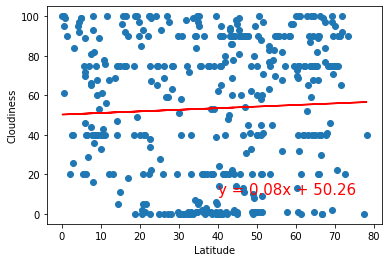

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2780103259739337


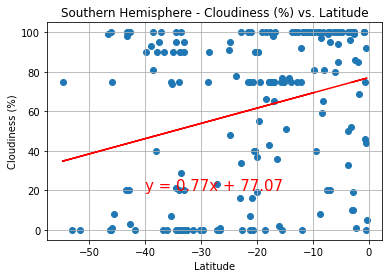

In [149]:
x_values = south_data['Lat']
y_values = south_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
print(f'The r-value is: {rvalue}')
# plt.savefig('south_lat_cloud_lr.png')
plt.show()

The r-value is: 0.0035263772085582894


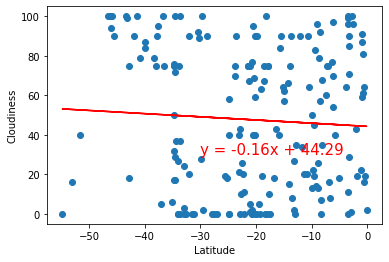

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.2004105635880801


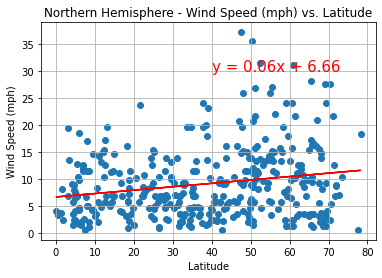

In [138]:
x_values = north_data['Lat']
y_values = north_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
print(f'The r-value is: {rvalue}')
# plt.savefig('south_lat_wind_lr.png')
plt.show()

The r-value is: 0.04019723576144484


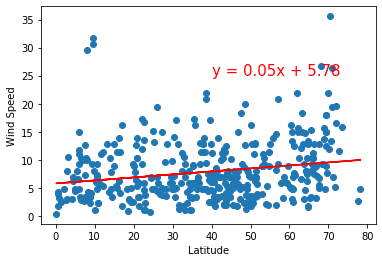

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.15246958799517396


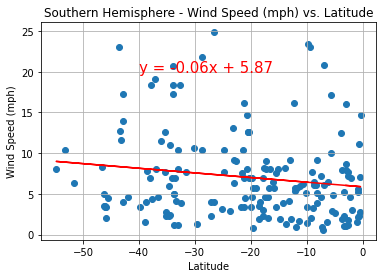

In [151]:
x_values = south_data['Lat']
y_values = south_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
print(f'The r-value is: {rvalue}')
# plt.savefig('south_lat_wind_lr.png')
plt.show()

The r-value is: 0.017128274759839232


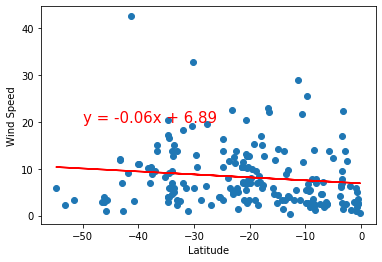